In [9]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import Region
from PIL import Image

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# **Pytesserat**

1. [Pytesseract](https://pypi.org/project/pytesseract/)

In [5]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

## Example1

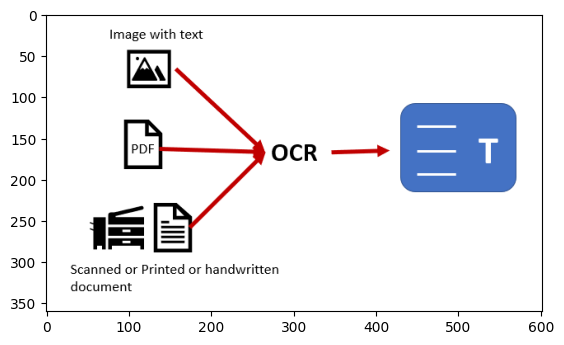

In [6]:
img = cv2.imread("images/ocr.png")
gray = cv2.imread("images/ocr.png",0)
showC(img)

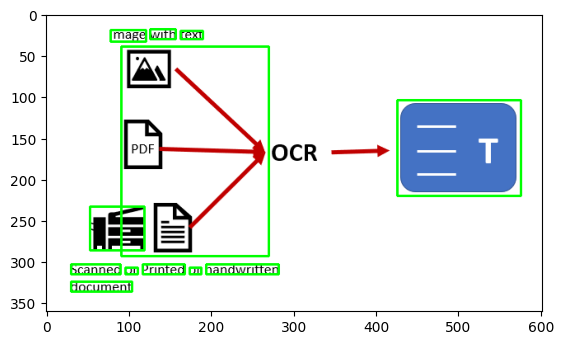

In [10]:
text_data = pytesseract.image_to_data(Image.fromarray(gray), output_type=pytesseract.Output.DICT)
img_copy = img.copy()
n_boxes = len(text_data['text'])
for i in range(n_boxes):
    if int(text_data['conf'][i]) > 0:
        (x, y, w, h) = (text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i])
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = text_data['text'][i]
        if text =="Allow":
            print(f"Text: {text}, Bounding Box: {x}, {y}, {w}, {h}")
            

showC(img_copy)

## Example 2

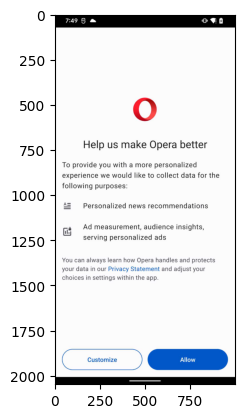

In [11]:
img2 = cv2.imread("images/k.jpg")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
showC(img2)

index:3
512 1854 445 117


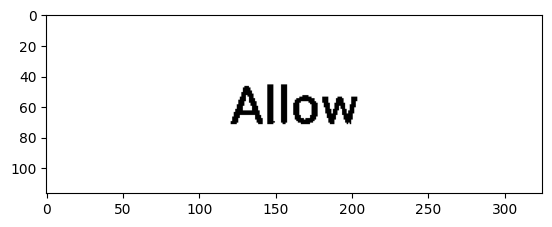

In [13]:
_, threshold = cv2.threshold(gray2, 180, 255,cv2.THRESH_BINARY_INV)
biggest, _, _ = Region.SelectShape(threshold,100,150, "height")
biggest = Region.SelectShapeStd (biggest)

x,y, w, h = cv2.boundingRect(biggest)
print(x,y, w, h )
OFFSET = 60 

crop = (img2[y:y+h, x+OFFSET:x+w-OFFSET])
crop = cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY)

_, threshold  = cv2.threshold (crop, 180, 255, cv2.THRESH_BINARY)

_, threshold  = cv2.threshold (crop, 180, 255, cv2.THRESH_BINARY)
threshold_not = cv2.bitwise_not(threshold)
show(threshold_not)

Text: Allow, Bounding Box: 121, 46, 83, 26


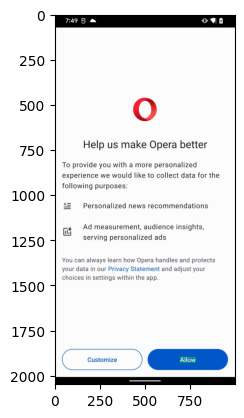

In [14]:
text_data = pytesseract.image_to_data(Image.fromarray(threshold_not), output_type=pytesseract.Output.DICT)
img_copy = img2.copy()
n_boxes = len(text_data['text'])

for i in range(n_boxes):
    if int(text_data['conf'][i]) > 0:
        (x1, y1, w1, h1) = (text_data['left'][i], text_data['top'][i], text_data['width'][i], text_data['height'][i])
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = text_data['text'][i]
        if text =="Allow":
            print(f"Text: {text}, Bounding Box: {x1}, {y1}, {w1}, {h1}")

            break

x_text = x  + x1 + OFFSET
y_text = y  + y1

img_copy =img2.copy()
cv2.rectangle(img_copy, (x_text, y + y1), (x_text + w1, y + y1 +h1), (0, 255, 0), 2)
showC(img_copy)

# **PaddlePaddle**
1. [PaddlePaddle](https://github.com/PaddlePaddle)
2. [PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR)
3. [How_to_install_paddlepadlle_cpu_gpu] (https://www.paddlepaddle.org.cn/documentation/docs/en/install/pip/windows-pip_en.html)

In [18]:
import paddleocr 
import cv2
import pickle 

img = cv2.imread('images/ocr.png')
ocr = paddleocr.PaddleOCR(use_angle_cls=True)
result = ocr.ocr('images/ocr.png')
with open ('resultOCR.pkl' ,'wb') as file:
    pickle.dump(result,file)

[2023/11/28 22:32:16] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\manmu/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\manmu/.paddleocr/whl\\det\\ch\\ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

In [19]:
_result = np.squeeze(result, axis=0)
print(_result[0])

[list([[77.0, 18.0], [191.0, 18.0], [191.0, 33.0], [77.0, 33.0]])
 ('Image with text', 0.9482091069221497)]


coordinate: [[77.0, 18.0], [191.0, 18.0], [191.0, 33.0], [77.0, 33.0]]
content: ('Image with text', 0.9482091069221497)
------------------------------------------------------------
coordinate: [[101.0, 153.0], [134.0, 153.0], [134.0, 173.0], [101.0, 173.0]]
content: ('PDF', 0.8622198104858398)
------------------------------------------------------------
coordinate: [[274.0, 156.0], [331.0, 156.0], [331.0, 179.0], [274.0, 179.0]]
content: ('OCR', 0.9856838583946228)
------------------------------------------------------------
coordinate: [[507.0, 149.0], [551.0, 149.0], [551.0, 182.0], [507.0, 182.0]]
content: ('T', 0.9845138192176819)
------------------------------------------------------------
coordinate: [[30.0, 302.0], [282.0, 302.0], [282.0, 316.0], [30.0, 316.0]]
content: ('Scanned orPrinted orhandwritten', 0.9434703588485718)
------------------------------------------------------------
coordinate: [[30.0, 324.0], [105.0, 324.0], [105.0, 339.0], [30.0, 339.0]]
content: ('document'

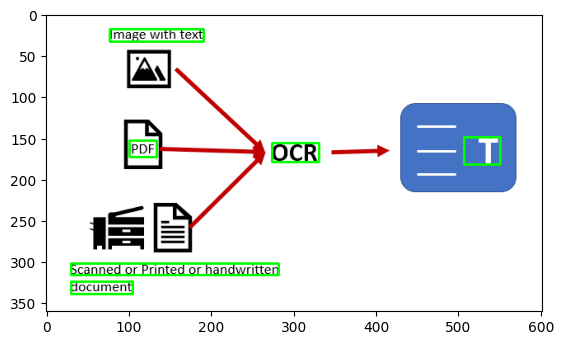

In [20]:
img_copy = img.copy()
for it in _result:
      
    # it[0] chua toa do cua rectangle
    print(f'coordinate: {it[0]}')
    print(f'content: {it[1]}')
    print('--'*30)
    coordinate = it[0]
    content = it[1][0]
    top_left =       (int(coordinate[0][0]), int(coordinate[0][1]))
    bottom_right =   (int(coordinate[2][0]), int(coordinate[2][1]))
    cv2.rectangle(img,top_left, bottom_right,(0,255,0),2)

showC(img)